In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2024-05-02 13:52:10.215138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 13:52:10.215236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 13:52:10.352086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(xtr, ytr), (xt, yt) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
xtr = xtr.reshape((xtr.shape[0], 28, 28, 1)).astype('float32') / 255
xt = xt.reshape((xt.shape[0], 28, 28, 1)).astype('float32') / 255

ytr = to_categorical(ytr)
yt = to_categorical(yt)

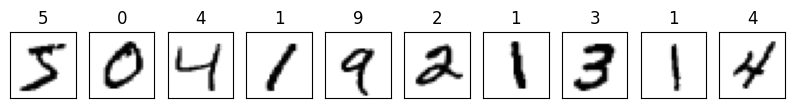

In [4]:
num_classes = yt.shape[1]
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
    ax[i].xaxis.set_visible(False) 
    ax[i].yaxis.set_visible(False) 
    ax[i].set_title(y_train1[i]) 
    ax[i].imshow(x_train[i], cmap=plt.cm.binary)

In [5]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (5,5), padding='valid'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(1152, 'relu'),
    Dense(256, 'relu'),
    Dense(10, 'softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1152)           │     5,309,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,608,138 (21.39 MB)

 Trainable params: 5,608,138 (21.39 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(xtr, ytr, validation_data=(xt, yt), epochs=10, batch_size=200, verbose=2)
model.evaluate(xt, yt, verbose=0)

Epoch 1/10


I0000 00:00:1714657947.911653     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714657947.929898     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


300/300 - 7s - 23ms/step - accuracy: 0.9424 - loss: 0.1851 - val_accuracy: 0.9737 - val_loss: 0.0816
Epoch 2/10


W0000 00:00:1714657949.707696     101 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


300/300 - 1s - 4ms/step - accuracy: 0.9819 - loss: 0.0579 - val_accuracy: 0.9795 - val_loss: 0.0652
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9862 - val_loss: 0.0415
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9837 - val_loss: 0.0547
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9837 - val_loss: 0.0544
Epoch 6/10
300/300 - 1s - 4ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9841 - val_loss: 0.0603
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9949 - loss: 0.0148 - val_accuracy: 0.9866 - val_loss: 0.0518
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9958 - loss: 0.0120 - val_accuracy: 0.9857 - val_loss: 0.0589
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9878 - val_loss: 0.0496
Epoch 10/10
300/300 - 1s - 4ms/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 0.9864 - val_loss: 0.0563


W0000 00:00:1714657961.784170     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714657962.661493     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.05625399202108383, 0.9864000082015991]

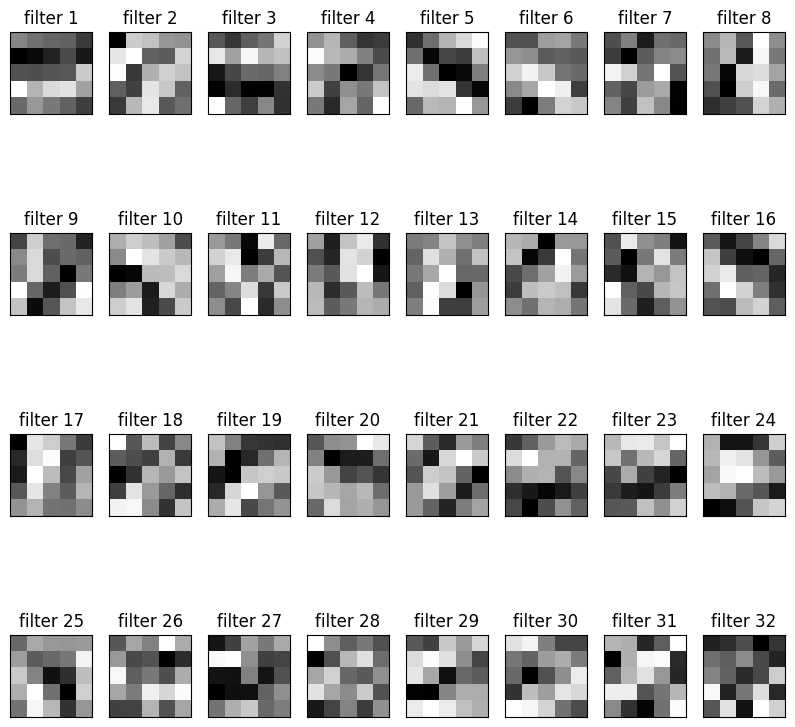

In [32]:
w, b = model.layers[0].get_weights()
w = w.reshape(5, 5, 32)


plt.figure(figsize = (10,10))
for i in range(4):
    for j in range(8):
        plt.subplot(4, 8, i * 8 + j + 1)
        p = plt.imshow(w[:, :, i*8+j], 'gray')
        p.axes.get_xaxis().set_visible(False)
        p.axes.get_yaxis().set_visible(False)
        plt.title('filter ' + str(i*8+j+1))

plt.show()